In [1]:

####################################################################################################
# https://keras.io/getting-started/sequential-model-guide/
####################################################################################################

import sys
import glob
import os.path

import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

from IPython.display import display
from IPython.display import Image
from PIL import Image

import keras
from keras import backend as K
from keras import layers
from keras import regularizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model



Using TensorFlow backend.


In [2]:

####################################################################################################
####################################################################################################

n_events    = 10
n_channels  = 127
n_outputs   = 2
n_timesteps = 100


####################################################################################################
# Training Data
####################################################################################################

train_data  = np.random.random((n_events, n_timesteps, n_channels))
train_truth = np.random.random((n_events, n_outputs))

print()
print("channels:  " + str(n_channels))
print("timesteps: " + str(n_timesteps))
print("outputs:   " + str(n_outputs) )
print()
print("training data shape: " + str(train_data.shape ))
print("training data shape: " + str(train_truth.shape))
print()




channels:  127
timesteps: 100
outputs:   2

training data shape: (10, 100, 127)
training data shape: (10, 2)



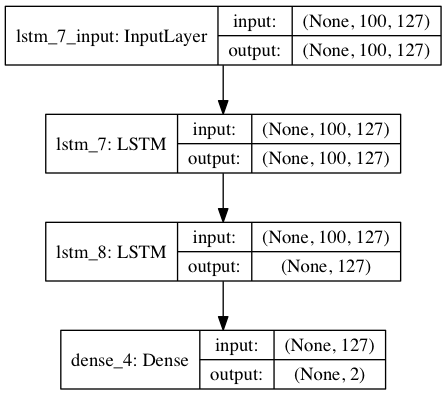

In [7]:

####################################################################################################
####################################################################################################

return_sequences = True

model = Sequential()
model.add(LSTM(n_channels, input_shape=(n_timesteps, n_channels), return_sequences=return_sequences))
model.add(LSTM(n_channels))

model.add(Dense(n_outputs, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


######################################################################################
# Save Model
######################################################################################

folder   = "models/"    
name     = 'model_xy_s2waveforms_lstm_' + 'elu'
name_h5  = folder + name + ".h5"
name_png = folder + name + ".png"

plot_model(model, to_file=name_png, show_layer_names=True, show_shapes=True)
model.save(name_h5, overwrite=True)


######################################################################################
######################################################################################

print()
display(Image.open(name_png))
print()
    


In [4]:

######################################################################################
######################################################################################

model.fit(
    train_data,
    train_truth,
    batch_size=16,
    epochs=1,
    verbose=True
)

print("Training Complete.")


Epoch 1/1
10/10 [==============================] - 9s 879ms/step - loss: 0.7047 - acc: 0.0000e+00
Training Complete.
